In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
G = nx.DiGraph()

In [3]:
df = pd.read_csv("clean_tweets.csv")

In [4]:
retweets = {}
listed_count = {}

In [5]:
for row in df.iterrows():
#     li.append(re.sub("[@:.]", "", row[1][1]))
#     li.append(row[1][0])
    if row[1][3] == "RT":
        if row[1][4] in retweets.keys():
            retweets[row[1][4]] += 1
        else:
            retweets[row[1][4]] = 1
    if row[1][1] in listed_count.keys():
        listed_count[row[1][1]] += 1
    else:
        listed_count[row[1][1]] = 1
    G.add_edge(row[1][1], row[1][4])

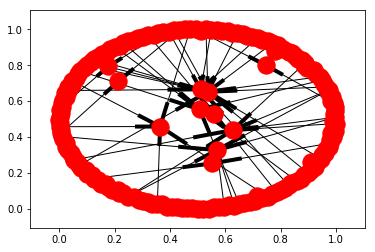

In [7]:
nx.draw_networkx(G, with_labels = False)

In [12]:
net_df = pd.DataFrame({"degree":G.degree(), "betweenness":nx.betweenness_centrality(G, normalized=False), \
                       "closeness":nx.closeness_centrality(G), "retweets":retweets, "listed_count":listed_count})

In [13]:
net_df["scaled_degree"] = net_df["degree"]/G.number_of_nodes()

In [22]:
net_df = net_df.fillna(0)

In [32]:
net_df["score"] = (net_df["listed_count"]-net_df["listed_count"].mean())/net_df["listed_count"].std() + \
(net_df["closeness"] - net_df["closeness"].mean())/net_df["closeness"].std() + \
(net_df["retweets"] - net_df["retweets"].mean())/net_df["retweets"].std() + \
(net_df["listed_count"] - net_df["listed_count"].mean())/net_df["listed_count"].std() + \
(net_df["scaled_degree"] - net_df["scaled_degree"].mean())/net_df["scaled_degree"].std() 

In [37]:
net_df["score"].sort_values(ascending = False)[:50]

lerma_pau          13.440028
TIME               13.417786
tecnolang          11.446517
AndreHebron1        9.778466
karasskarim         9.778466
CarlEva691          9.389819
athleticsEHS        9.389819
fuwayuzupi          9.015628
jkoufis9613         9.015628
eazeee2004          9.015628
tealtan             9.015628
mrstserc            7.994654
ChadPergram         7.083373
IntelGaming         5.371610
seulgifood          5.135843
LandBRPOAS          4.965418
davidpj70clark      4.965418
jenpsht             4.591227
bartoplayer         4.591227
Rude4eyez_          4.591227
_TechNerdEnt_       4.591227
Olympics            4.529584
bob_dammit          2.840987
DavidNakamura       2.402665
Timbaxter1          1.771690
intradue            1.303856
katemcloughlin4     0.410097
StolenSweeties      0.166826
BenMurphyTV         0.166826
__biaduarte         0.166826
dlazar13            0.166826
Best_Presents_      0.166826
ecobackpackers      0.166826
DJTagainin2020      0.166826
DrJillGildeaGP